# Data analysis of a 2AFC task

In [2]:
# Modifiable variables when changing computer location:
# Directory where the images will be stored:
directory_images = '/home/emma/github/TFG/results/fit_analysis/'
directory_functions = '/home/emma/github/TFG/functions'
directory_data = '/home/emma/github/TFG/data/'
directory_results = '/home/emma/github/TFG/results/'

In [3]:
# Importing all the libraries that will be used
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json 
from sklearn.linear_model import LinearRegression
import sys
import datetime

# Insert path where the functions are stored
sys.path.insert(1, directory_functions)

# Importing the functions that will be used
import rat_functions1 as rf
import help_plot as hp

## Storing the data into variables

In [4]:
# Name of the rats
rats = ["Rat 24 0.5 sec","Rat 25 0.5 sec","Rat 25 1 sec","Rat 35 1 sec", "Rat 36 0.5 sec", "Rat 37 0.5 sec","Rat 37 1 sec"]

## Open fit stimulus

In [5]:
stimulus =[0,0,0,0,0,0,0]
coherences = [0,0,0,0,0,0,0]
target_sigmas =[0,0,0,0,0,0,0]
rewards = [0,0,0,0,0,0,0]
performances = [0,0,0,0,0,0,0]
choices = [0,0,0,0,0,0,0]
dates = [0,0,0,0,0,0,0]

# Opening JSON file 
f = open(directory_data+'ordered_processed_dataset2_05sec.json',) 
# returns JSON object as  
# a dictionary 
data = json.load(f) 
f.close()

stimulus[0],coherences[0],target_sigmas[0],rewards[0],performances[0],choices[0],dates[0] = data[0][0],  data[1][0],  data[5][0], data[2][0], data[4][0], data[3][0], data[6][0]
stimulus[1],coherences[1],target_sigmas[1],rewards[1],performances[1],choices[1],dates[1] = data[0][1],  data[1][1],  data[5][1], data[2][1], data[4][1], data[3][1], data[6][1]
stimulus[4],coherences[4],target_sigmas[4],rewards[4],performances[4],choices[4],dates[4] = data[0][3],  data[1][3],  data[5][3], data[2][3], data[4][3], data[3][3], data[6][3]
stimulus[5],coherences[5],target_sigmas[5],rewards[5],performances[5],choices[5],dates[5] = data[0][4],  data[1][4],  data[5][4], data[2][4], data[4][4], data[3][4], data[6][4]


In [6]:
# Opening JSON file 
f = open(directory_data+'ordered_processed_dataset2_1sec.json',) 
# returns JSON object as  
# a dictionary 
data = json.load(f) 
f.close()

stimulus[2],coherences[2],target_sigmas[2],rewards[2],performances[2],choices[2],dates[2] = data[0][1],  data[1][1],  data[5][1], data[2][1], data[4][1], data[3][1], data[6][1]
stimulus[3],coherences[3],target_sigmas[3],rewards[3],performances[3],choices[3],dates[3] = data[0][2],  data[1][2],  data[5][2], data[2][2], data[4][2], data[3][2], data[6][2]
stimulus[6],coherences[6],target_sigmas[6],rewards[6],performances[6],choices[6],dates[6] = data[0][4],  data[1][4],  data[5][4], data[2][4], data[4][4], data[3][4], data[6][4]


In [7]:
for rat in range(len(rats)):
    print(rats[rat]+": "+str(len(stimulus[rat])))

Rat 24 0.5 sec: 25238
Rat 25 0.5 sec: 5016
Rat 25 1 sec: 3659
Rat 35 1 sec: 7103
Rat 36 0.5 sec: 17869
Rat 37 0.5 sec: 7374
Rat 37 1 sec: 5491


## Segment data

In [8]:
# i = 1
# t = 2
# # end = len(stimulus)-1
# stimulus = [stimulus[a][1000:len(stimulus[a])-1] for a in range(len(stimulus))]
# # stimulus_test = stimulus[:][8000:10000]
# coherences = [coherences[a][1000:len(stimulus[a])-1] for a in range(len(coherences))]
# # coherences_test = coherences[:][8000:10000]
# target_sigmas = [target_sigmas[a][1000:len(stimulus[a])-1] for a in range(len(target_sigmas))]
# # target_sigmas_test = target_sigmas[:][8000:10000]
# rewards =[rewards[a][1000:len(stimulus[a])-1] for a in range(len(rewards))]
# # rewards_test = rewards[:][8000:10000]
# performances =[performances[a][1000:len(stimulus[a])-1] for a in range(len(performances))]
# # performances_test = performances[:][8000:10000]
# choices = [choices[a][1000:len(stimulus[a])-1] for a in range(len(choices))]
# # choices_test = choices[:][8000:10000]
# choices_fit = [choices_fit[a][1000:len(stimulus[a])-1] for a in range(len(choices_fit))]

In [9]:
# i = 1
# t = 2
# # end = len(stimulus)-1
# stimulus = [stimulus[a][10000:30000] for a in range(len(stimulus))]
# # stimulus_test = stimulus[:][8000:10000]
# coherences = [coherences[a][10000:30000] for a in range(len(coherences))]
# # coherences_test = coherences[:][8000:10000]
# target_sigmas = [target_sigmas[a][10000:30000] for a in range(len(target_sigmas))]
# # target_sigmas_test = target_sigmas[:][8000:10000]
# rewards =[rewards[a][10000:30000] for a in range(len(rewards))]
# # rewards_test = rewards[:][8000:10000]
# performances =[performances[a][10000:30000] for a in range(len(performances))]
# # performances_test = performances[:][8000:10000]
# choices = [choices[a][10000:30000] for a in range(len(choices))]
# # choices_test = choices[:][8000:10000]
# # choices_fit = [choices_fit[a][10000:30000] for a in range(len(choices_fit))]

## Separing the data by coherences (real and target)
### Separing the data by target coherences

In [10]:
# Will compute a vector with the target coherences used for each rat
coherence_vectors = [] # coherence_vectors[rat][coherence]

for coh in coherences:
    coh_vec = rf.return_coherences_vector(coh)
    coherence_vectors.append(coh_vec)

In [11]:
coherence_vectors

[[-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0],
 [-1.0, -0.5, -0.15, 0.0, 0.15, 0.5, 1.0]]

In [12]:
# The stimulus, coherences, rewards, decisions, performances and target sigmas will be divided by coherences
results_divided_coherence = [] # The vector will be organized as follows: 
                                                  # results_divided_coherence[rat][coherence]=[rewards, decisions, performances, stimulus, target_sigmas]

for rat in range(len(rats)):
    divided_coherence = []
    for coherence in coherence_vectors[rat]:
        divided_coherence.append(rf.divide_coh(coherences[rat],rewards[rat],choices[rat],performances[rat],stimulus[rat],target_sigmas[rat],coherence))
    results_divided_coherence.append(divided_coherence)


In [13]:
len(results_divided_coherence)

7

In [14]:
# The percentages, the number of trials and the coherence vectors avobe x trials will be stored into the following variables for each rat:
percentages = [] # percentages[rat][strong_coherence]
total_number_trials = [] # total_number_trials[rat][strong_coherence]
strong_coherence_vectors = [] # strong_coherence_vectors[rat] coherences which have more than 2500 trials

n_trials_threshold = 20 # Only the coherences which have avobe n_trials_threshold will be used

for rat in range(len(rats)):
    perc = []
    number_trials = []
    coh_vector = []
    # for each coherence which has more than n_trials_threshold, the percentage of right choice will be computed
    for i in range(len(results_divided_coherence[rat])):
        if len(results_divided_coherence[rat][i][1]) > n_trials_threshold:
            perc.append(sum(results_divided_coherence[rat][i][1])/len(results_divided_coherence[rat][i][1]))
            coh_vector.append(coherence_vectors[rat][i])
            number_trials.append(len(results_divided_coherence[rat][i][1]))
    percentages.append(perc)
    total_number_trials.append(number_trials)
    strong_coherence_vectors.append(coh_vector)

[0.05231607629427793, 0.14313134082807788, 0.3356254959005554, 0.49953066332916146, 0.6582539273757404, 0.87860513896172, 0.9618239660657476]
[0.0425531914893617, 0.10817941952506596, 0.17876344086021506, 0.29799851742031136, 0.40675675675675677, 0.6736990154711674, 0.8579881656804734]
[0.02127659574468085, 0.18404907975460122, 0.35489833641404805, 0.5100446428571429, 0.671559633027523, 0.8992, 0.9695121951219512]
[0.017391304347826087, 0.07824427480916031, 0.3240574506283663, 0.5326497571505666, 0.7045454545454546, 0.9016236867239733, 0.9733333333333334]
[0.05332302936630603, 0.1690512048192771, 0.36971046770601335, 0.51456517116734, 0.7134394668641244, 0.8965917893106119, 0.9814366424535916]
[0.042801556420233464, 0.11063094209161625, 0.21323529411764705, 0.33405522468868437, 0.4537286612758311, 0.6984273820536541, 0.8710801393728222]
[0.03549060542797495, 0.08960176991150443, 0.21266968325791855, 0.35159500693481277, 0.4816753926701571, 0.7938718662952646, 0.9366666666666666]


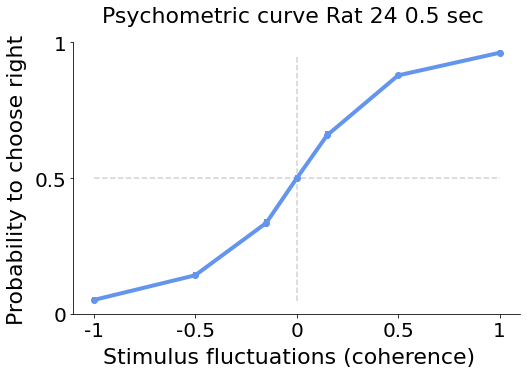

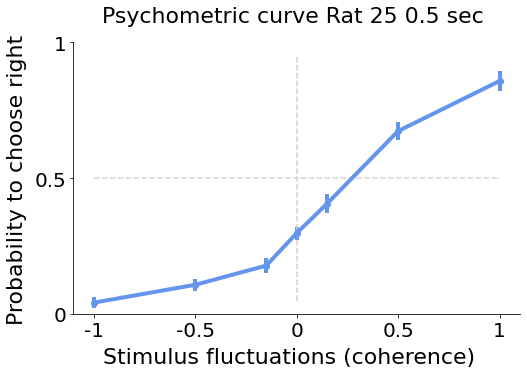

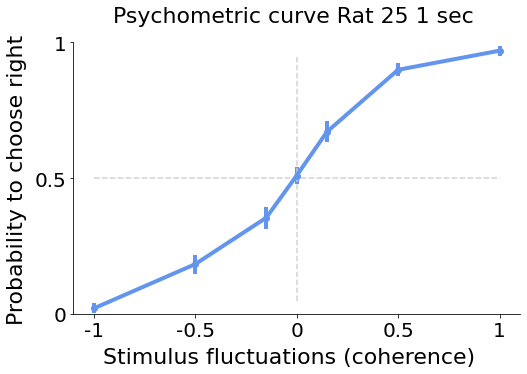

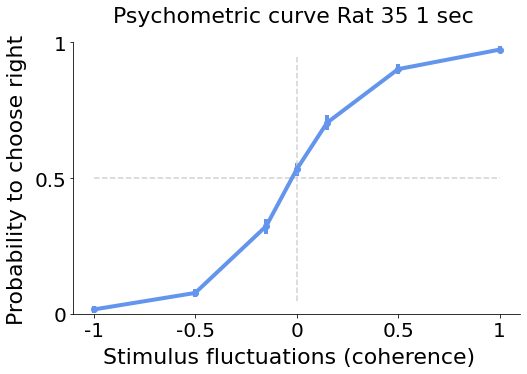

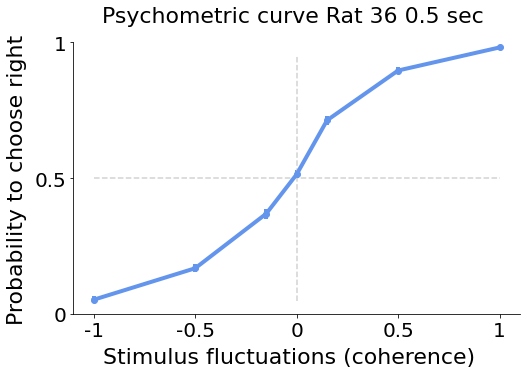

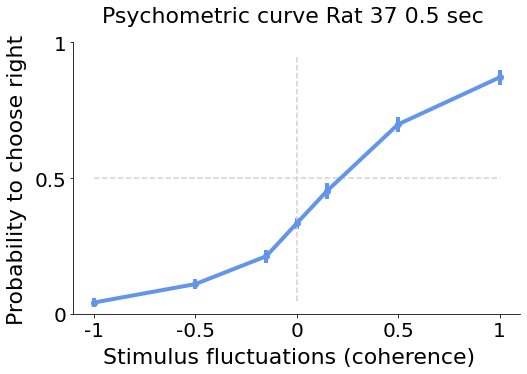

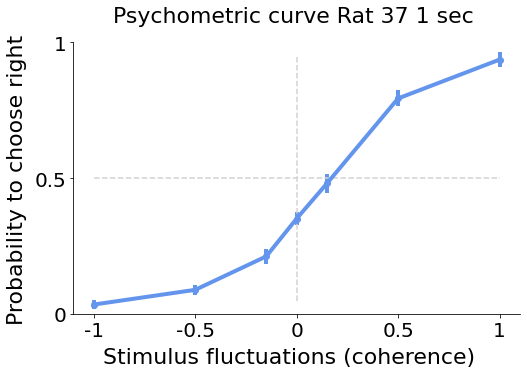

In [24]:
# For each rat, plot the psychometric curve with the coherence values which have above x trials
# fig, axs = plt.subplots(figsize = (8,5))
for rat in range(len(rats)):
    fig, axs = plt.subplots(figsize = (8,5))
    # Computing the confidence intervals (95%)
    z = 1.96
    conf_int = [[percentages[rat][i]-z*(np.sqrt((percentages[rat][i]*(1-percentages[rat][i]))/total_number_trials[rat][i])) for i in range(len(total_number_trials[rat]))],
                [percentages[rat][i]+z*(np.sqrt((percentages[rat][i]*(1-percentages[rat][i]))/total_number_trials[rat][i])) for i in range(len(total_number_trials[rat]))]]
    conf_int = [[percentages[rat][i]-conf_int[0][i] for i in range(len(percentages[rat]))],[conf_int[1][i]-percentages[rat][i] for i in range(len(percentages[rat]))]]
    axs.errorbar(strong_coherence_vectors[rat],percentages[rat],conf_int,marker='o',label = rats[rat],color = "cornflowerblue",linewidth=4)
    
    print(percentages[rat])
#     conf_int = [[percentages_fit[rat][i]-z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))],
#                 [percentages_fit[rat][i]+z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))]]
#     conf_int = [[percentages_fit[rat][i]-conf_int[0][i] for i in range(len(percentages_fit[rat]))],[conf_int[1][i]-percentages_fit[rat][i] for i in range(len(percentages_fit[rat]))]]
# #     axs.errorbar(strong_coherence_vectors_fit[rat],percentages_fit[rat],conf_int,marker='o',label = "Fitted model")
#     conf_int = [[percentages_fit[rat][i]-z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))],
#                 [percentages_fit[rat][i]+z*(np.sqrt((percentages_fit[rat][i]*(1-percentages_fit[rat][i]))/total_number_trials_fit[rat][i])) for i in range(len(total_number_trials_fit[rat]))]]
#     axs.fill_between(strong_coherence_vectors_fit[rat],conf_int[0],conf_int[1],alpha=0.2,facecolor='#089FFF', linewidth=4, linestyle='dashdot', antialiased=True,label = "Fitted model")

    fig.suptitle(" Psychometric curve "+rats[rat],fontsize = 22)
#     axs.legend(loc = "upper left",fontsize = 18)
    fig.text(0.5, -0.01, "Stimulus fluctuations (coherence)", ha='center',fontsize = 22)
    fig.text(0.01, 0.5, "Probability to choose right", va='center', rotation='vertical',fontsize = 22)
    axs.axis([-1.1,1.1,0,1])
    hp.xticks(axs,[-1,-0.5,0,0.5,1],xticklabels=None,fontsize=20)
    hp.yticks(axs,[0,0.5,1],yticklabels = None,fontsize =20)

    hp.remove_axis(axs)
    plt.hlines(0.5,-1,1,linestyle='--',color='lightgrey')
    plt.vlines(0,0.05,0.95,linestyle='--',color='lightgrey')

# fig.savefig(directory_images+'psychometric_curves/psychometric_curves_target_coherences.png', bbox_inches = 'tight')

## Separing the data by sigma and coherence

In [25]:
# Will compute a vector with the sigma used for each rat and each coherence
sigma_lists = [] #sigma_lists[rat][sigma]

for rat in range(len(rats)):
    sigma_list = []
    for i in range(len(results_divided_coherence[rat])):
        for a in rf.count(results_divided_coherence[rat][i][4]):
            sigma_list.append(a)
    sigma_list = rf.count(sigma_list)
    sigma_list = sorted(sigma_list)
    sigma_lists.append(sigma_list)

In [26]:
# Data for each sigma will be stored
results_divided_sigma = [] # results_divided_sigma[rat][coherence][sigma][reward, decision, performance, stim]

for rat in range(len(rats)):
    divided_sigma = []
    for i in range(len(results_divided_coherence[rat])):
        results = []
        for sigma in sigma_lists[rat]:
            results.append(rf.divide_sigma(results_divided_coherence[rat][i][0],results_divided_coherence[rat][i][1],results_divided_coherence[rat][i][2],
                                             results_divided_coherence[rat][i][3],results_divided_coherence[rat][i][4],sigma))
        divided_sigma.append(results)
    results_divided_sigma.append(divided_sigma)

In [27]:
# Compute the percentages of right choice for the results_divided_sigma
percentages_lists, coherences_lists, length_lists, length_all_rats = rf.compute_percentages(rats,results_divided_sigma,coherence_vectors)

### Comparing coherence distribution for each sigma

In [28]:
# Computing the coherence vector for all rats together
coherences_all_rats = []
for rat in range(len(rats)):
    coherences_all_rats.append(coherence_vectors[rat])
coherences_all_rats = rf.return_vector(coherences_all_rats)

# Computing the sigma vector for all rats tohether

sigmas_all_rats = rf.return_vector(sigma_lists)

FileNotFoundError: [Errno 2] No such file or directory: '/home/emma/github/TFG/results/fit_analysis//recount_trials/recount_trials_all_rats.png'

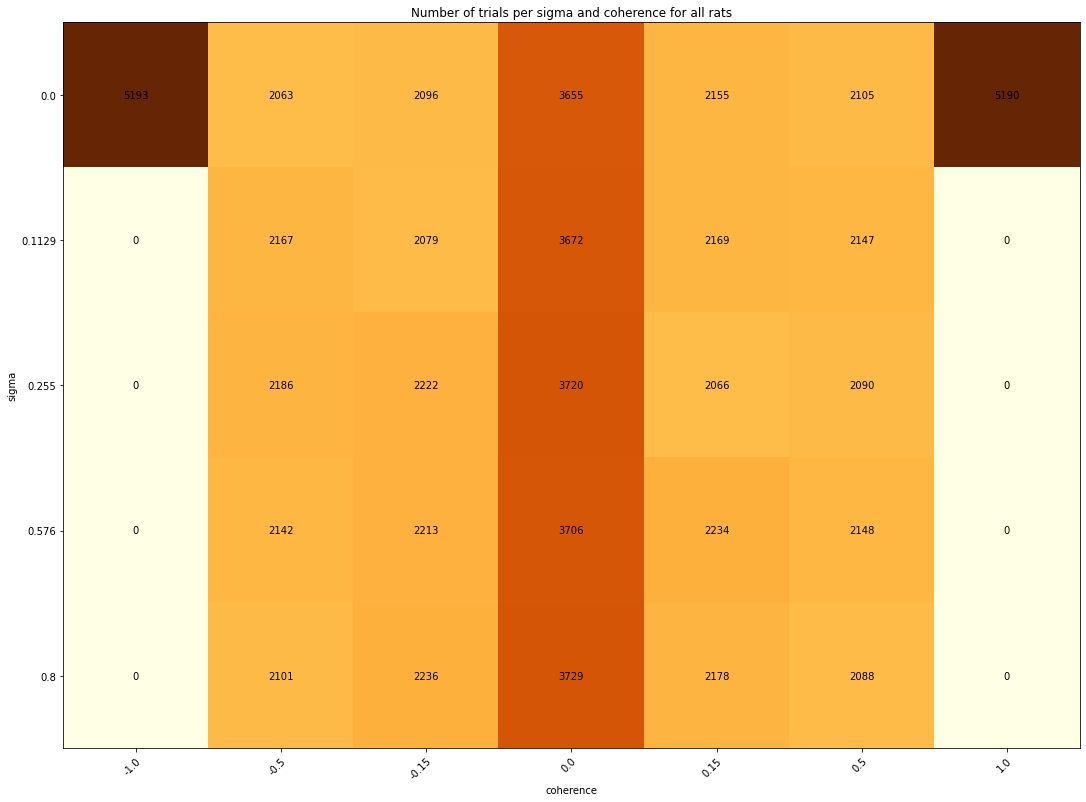

In [29]:
# Generates a file with a table of the number of trials for each coherence and sigma for all rats
rf.recount_trials_all_rats(sigma_lists,coherences_all_rats,length_all_rats,"all rats",coherence_vectors,rats,sigmas_all_rats,directory_images)
# Will make the chart with the recount of trials for each coherence and each sigma for each rat
for rat in range(len(rats)):
    rf.recount_trials(sigma_lists[rat],coherence_vectors[rat],length_lists[rat],rats[rat],coherences_lists[rat],directory_images)

In [ ]:
# Compute sensitivity and bias using curve_fit
all_sensitivity, all_bias = rf.compute_sensitivity(rats,coherences_lists,percentages_lists,sigma_lists,directory_images)

In [30]:
# Performing bootstrap to compute confidence intervals
n_trials = 10

all_percentages_lists_boot = []
all_coherences_lists_boot = [] 
all_length_lists_boot = [] 
all_length_all_rats_boot  = []
for i in range(n_trials):
    new_divided_sigma = rf.bootstrap(results_divided_sigma)
    percentages_lists_boot, coherences_lists_boot, length_lists_boot, length_all_rats_boot = rf.compute_percentages(rats,new_divided_sigma,coherence_vectors)
    all_percentages_lists_boot.append(percentages_lists_boot)
    all_coherences_lists_boot.append(coherences_lists_boot)
    all_length_lists_boot.append(length_lists_boot)
    all_length_all_rats_boot.append(length_all_rats_boot)

In [31]:
# Compute sensitivity and bias using curve_fit for the bootstrap data
all_sensitivity_boot = []
all_bias_boot = []
for i in range(len(all_percentages_lists_boot)):
    sensitivity_boot, bias_boot = rf.compute_sensitivity_boot(rats,all_coherences_lists_boot[i],all_percentages_lists_boot[i],sigma_lists)
    all_sensitivity_boot.append(sensitivity_boot)
    all_bias_boot.append(bias_boot)

In [32]:
# Computing the confidence intervals for the sensitivity
sensitivity_sigma = [np.zeros((len(sigma_lists[0]),n_trials)),np.zeros((len(sigma_lists[1]),n_trials)),np.zeros((len(sigma_lists[2]),n_trials)),np.zeros((len(sigma_lists[3]),n_trials)),np.zeros((len(sigma_lists[4]),n_trials)),np.zeros((len(sigma_lists[5]),n_trials)),np.zeros((len(sigma_lists[6]),n_trials))]

for trial in range(len(all_sensitivity_boot)):
    for rat in range(len(all_sensitivity_boot[trial])):
        for sigm in range(len(all_sensitivity_boot[trial][rat])):
             sensitivity_sigma[rat][sigm][trial] = all_sensitivity_boot[trial][rat][sigm]

conf_intervals_sensitivity = []
for rat in range(len(rats)):
    sensitivity_rat = []
    for a in range(len(all_sensitivity_boot[0][rat])):
        sens = sensitivity_sigma[rat][a]

        z = 1.96
        conf_int = [np.mean(sens)-z*np.std(sens),np.mean(sens)+z*np.std(sens)]
        sensitivity_rat.append(conf_int)

    conf_intervals_sensitivity.append(sensitivity_rat)

In [33]:
# Computing the bias confidence intervals
bias_sigma = [np.zeros((len(sigma_lists[0]),n_trials)),np.zeros((len(sigma_lists[1]),n_trials)),np.zeros((len(sigma_lists[2]),n_trials)),np.zeros((len(sigma_lists[3]),n_trials)),np.zeros((len(sigma_lists[4]),n_trials)),np.zeros((len(sigma_lists[5]),n_trials)),np.zeros((len(sigma_lists[6]),n_trials))]

for trial in range(len(all_bias_boot)):
    for rat in range(len(all_bias_boot[trial])):
        for sigm in range(len(all_bias_boot[trial][rat])):
             bias_sigma[rat][sigm][trial] = all_bias_boot[trial][rat][sigm]

conf_intervals_bias = []
for rat in range(len(rats)):
    bias_rat = []
    for a in range(len(all_bias_boot[0][rat])):
        bias = bias_sigma[rat][a]

        z = 1.96
        conf_int = [np.mean(bias)-z*np.std(bias),np.mean(bias)+z*np.std(bias)]
        bias_rat.append(conf_int)

    conf_intervals_bias.append(bias_rat)


NameError: name 'all_sensitivity' is not defined

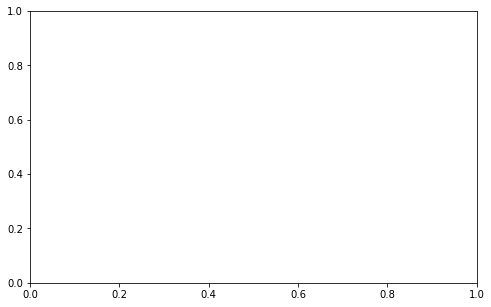

In [34]:
# Plot of the sensitivity over sigma
for rat in range(len(rats)):
    fig, axs = plt.subplots(figsize = (8,5))
    conf_int = [[conf_intervals_sensitivity[rat][i][0] for i in range(len(sigma_lists[rat]))],[conf_intervals_sensitivity[rat][i][1] for i in range(len(sigma_lists[rat]))]]
    conf_int_0 = []
    conf_int_1 = []
    new_sigma_list = []
    new_sensitivity = []
    for i in range(len(conf_int[0])):
        if str(conf_int[0][i]) != "nan":
            if all_sensitivity[rat][i] != None:

                conf_int_0.append(conf_int[0][i]-all_sensitivity[rat][i])
                conf_int_1.append(all_sensitivity[rat][i]-conf_int[1][i])
                new_sigma_list.append(sigma_lists[rat][i])
                new_sensitivity.append(all_sensitivity[rat][i])
    conf_int = [conf_int_0,conf_int_1]
    plt.errorbar(new_sigma_list,new_sensitivity,conf_int,marker='o',color= "skyblue")
#     plt.axis([-0.1,0.9,-1,50])
    
    
    hp.remove_axis(axs)
    fig.suptitle(rats[rat]+" sensitivity",fontsize = 18)
    fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Sensitivity", va='center', rotation='vertical',fontsize = 18)
    fig.savefig(directory_images+'sensitivity/sensitivity_'+rats[rat]+'.png', bbox_inches = 'tight')

In [ ]:
# Plot of the bias over sigma
for rat in range(len(rats)):
    fig, axs = plt.subplots(figsize = (8,5))
    conf_int = [[conf_intervals_bias[rat][i][0] for i in range(len(sigma_lists[rat]))],[conf_intervals_bias[rat][i][1] for i in range(len(sigma_lists[rat]))]]
    conf_int_0 = []
    conf_int_1 = []
    new_sigma_list = []
    new_bias = []
    for i in range(len(conf_int[0])):
        if str(conf_int[0][i]) != "nan":
            if all_bias[rat][i] != None:
                conf_int_0.append(conf_int[0][i]-all_bias[rat][i])
                conf_int_1.append(all_bias[rat][i]-conf_int[1][i])
                new_sigma_list.append(sigma_lists[rat][i])
                new_bias.append(all_bias[rat][i])
    conf_int = [conf_int_0,conf_int_1]
    plt.errorbar(new_sigma_list,new_bias,conf_int,marker='o',color="skyblue")
    
 
    plt.hlines(0,-0.1,0.9,color = "grey",linestyles = "--")
    plt.axis([-0.1,0.9,-0.8,0.3])
    hp.remove_axis(axs)
    fig.suptitle(rats[rat]+" bias",fontsize = 18)
    fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Bias", va='center', rotation='vertical',fontsize = 18)
    fig.savefig(directory_images+'bias/bias'+rats[rat]+'.png', bbox_inches = 'tight')

## Dividing the data by sigma (without taking coherence into account)

In [ ]:
results_divided_sigma_nocoh_fit = [] # results_divided_sigma_nocoh[rat][sigma][reward,decision,performance,stim]
perc_sigma_nocoh_fit = []
# Dividing the data over sigma (not by coherence)
results_divided_sigma_nocoh = [] # results_divided_sigma_nocoh[rat][sigma][reward,decision,performance,stim]
perc_sigma_nocoh = []

for rat in range(len(rats)):
    divided_sigma = []
    for sigma in sigma_lists[rat]:
        divided_sigma.append(rf.divide_sigma_1(rewards[rat],choices[rat],performances[rat],stimulus[rat],target_sigmas[rat],sigma))
    perc = []
    number_trials = []
    results_divided_sigma_nocoh.append(divided_sigma)
    for i in range(len(divided_sigma)):
        perc.append(sum(results_divided_coherence[rat][i][2])/len(results_divided_coherence[rat][i][2]))
        number_trials.append(len(results_divided_coherence[rat][i][1]))
    perc_sigma_nocoh.append(perc)


    fig, axs = plt.subplots(figsize = (8,5))
    plt.plot(sigma_lists[rat],perc,marker = 'o',color="skyblue")
    plt.axis([0,1,0,1])
    hp.remove_axis(axs)
    fig.suptitle(rats[rat]+" accuracy",fontsize = 18)
    fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Accuracy", va='center', rotation='vertical',fontsize = 18)
#     fig.savefig(directory_images+'accuracy_vs_sigma/accuracy_vs_sigma'+rats[rat]+'.png', bbox_inches = 'tight')
#     divided_sigma = []
        
#     for sigma in sigma_lists[rat]:
#         divided_sigma.append(rf.divide_sigma_1(rewards[rat],choices_fit[rat],performances[rat],stimulus[rat],target_sigmas[rat],sigma))
#     perc = []
#     number_trials = []
#     results_divided_sigma_nocoh_fit.append(divided_sigma)
#     for i in range(len(divided_sigma)):
#         perc.append(sum(results_divided_coherence_fit[rat][i][2])/len(results_divided_coherence_fit[rat][i][2]))
#         number_trials.append(len(results_divided_coherence_fit[rat][i][1]))
#     perc_sigma_nocoh_fit.append(perc)


#     plt.plot(sigma_lists[rat],perc,marker = 'o',color="red")
#     plt.axis([0,1,0,1])
#     hp.remove_axis(axs)
#     fig.suptitle(rats[rat]+" accuracy",fontsize = 18)
#     fig.text(0.5, 0.02, "Sigma", ha='center',fontsize = 16)
#     fig.text(0.03, 0.5, "Accuracy", va='center', rotation='vertical',fontsize = 18)
#     fig.savefig(directory_images+'accuracy_vs_sigma/accuracy_vs_sigma'+rats[rat]+'.png', bbox_inches = 'tight')

# PODRIA FER ELS CONFIDENCE INTERVALS AQUÍ

In [ ]:
len(results_divided_sigma_nocoh[0][0][3])

## Kernel

In [ ]:
for rat in range(len(rats)):
    for sig in range(len(results_divided_sigma_nocoh[rat])):
        for sti in range(len(results_divided_sigma_nocoh[rat][sig][3])):
            if len(results_divided_sigma_nocoh[rat][sig][3][sti]) == 20:
                group = 2

                results_divided_sigma_nocoh[rat][sig][3][sti] = np.ndarray.tolist(np.asarray(results_divided_sigma_nocoh[rat][sig][3][sti]).reshape(-1, group).mean(axis=1))
            

In [35]:
group = 2
a = np.ndarray.tolist(np.asarray(results_divided_sigma_nocoh[0][2][3][2]).reshape(-1, group).mean(axis=1))
print(results_divided_sigma_nocoh[0][2][3][2])
print(a)

NameError: name 'results_divided_sigma_nocoh' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

def divided_time_PK(rats,results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats_list,directory_images):
     # results_divided_sigma_coh[rat][sigma][reward,decision,performance,stim]
        fig, ((axs1,axs2,axs3)) = plt.subplots(1,3,figsize = (18,4))

        axs = [0,axs1,axs2,axs3,0,0]
        color = [0,"maroon","brown","red","orangered","orange","yellow"]
        index = 1
        aranges = [np.arange(2,5,1),np.arange(2,5,1),np.arange(2,5,1),np.arange(2,5,1),np.arange(2,5,1),np.arange(2,5,1),np.arange(2,5,1)]
        for rat in rats:
            for a in aranges[rat]:
                print(rat,len(results_divided_sigma_nocoh[rat][a][3][0]))
#                 try:
                PK(results_divided_sigma_nocoh[rat][a][1],results_divided_sigma_nocoh[rat][a][3],axs[index],color[index])            
                PK_fit(results_divided_sigma_nocoh[rat][a][1],results_divided_sigma_nocoh[rat][a][3],axs[index],color[index])            
                axs[index].set_title("Sigma = "+str(sigma_lists[rat][a]))
                axs[index].spines['right'].set_visible(False)
                axs[index].spines['top'].set_visible(False)
#                 except:
#                     print("another error")
                index +=1
#         plt.ylim(-1.5,1.5)    
        fig.suptitle("PK for "+rats_list[rat],fontsize = 18)
        fig.text(0.5, 0.001, 'Frame nº', ha='center',fontsize = 16)
        fig.text(0.08, 0.5, 'Impact', va='center', rotation='vertical',fontsize = 18)
        
#         fig.savefig(directory_images+'PK/temporal_PK'+rats_list[rat]+'.png', bbox_inches = 'tight')

In [ ]:
# def PK(decision,stim,axs,col):
#     logit_mod = sm.Logit(decision, stim)
#     result = logit_mod.fit()

#     pars_list =result.params
#     confidence_interval = result.conf_int()
#     conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
#     conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
#     axs.errorbar(np.arange(0,len(pars_list),1),pars_list,conf_int,color = col,marker='s')

#     return(confidence_interval)


In [ ]:
def PK(decision,stim,axs,col):
    model = LogisticRegression(C=0.1)
    result = model.fit(stim, decision)

    pars_list = result.coef_[0]
    stdev = np.sqrt(sum((model.predict(stim) - decision)**2) / (len(decision) - 2))
    conf_int = (pars_list -1.96*stdev, pars_list-1.96*stdev)

    axs.plot(np.arange(0,len(pars_list),1),pars_list)

#     return(confidence_interval)


In [ ]:
def PK_fit(decision,stim,axs,col):
    logit_mod = sm.Logit(decision, stim)
    result = logit_mod.fit()

    pars_list =result.params
    confidence_interval = result.conf_int()
    conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
    axs.plot(np.arange(0,len(pars_list),1),pars_list)

#     axs.fill_between(np.arange(0,len(pars_list),1),conf_int[0],conf_int[1],alpha=0.2, facecolor='#089FFF',
#     linewidth=4, linestyle='dashdot', antialiased=True)

   
    return(confidence_interval)


In [ ]:
rats_sec = [1,2,4]
plt.figure()
divided_time_PK([0],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

In [ ]:
rats_sec = [1,2,4]
divided_time_PK([1],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

In [ ]:
rats_sec = [1,2,4]
divided_time_PK([2],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

In [ ]:
rats_half = [0,3]
divided_time_PK([3],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

In [ ]:
rats_half = [0,3]
divided_time_PK([4],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

In [ ]:
rats_half = [0,3]
divided_time_PK([5],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

In [ ]:
rats_half = [0,3]
divided_time_PK([6],results_divided_sigma_nocoh,results_divided_sigma_nocoh_fit,sigma_lists,rats,directory_images)

In [ ]:
# Spatial Kernel for all sigmas for each rat

# For each stimulus, how many stimulus are from -1 to -0.9, etc to get a transformed stimulus, then make a logistic regression
color = [0,"maroon","brown","red","orangered","orange","yellow"]

new_transf_stim = rf.transformed_stimulus([stimulus[1],stimulus[2],stimulus[4]])
new_transf_sec_stim  = rf.transformed_stimulus([stimulus[0],stimulus[3]])
new_dec_half = [choices[1],choices[2],choices[4]]
new_dec_sec = [choices[0],choices[3]]

 
for rat in range(len([1,2,4])):
#     try:
    rats_half = [1,2,4]

    fig, axs = plt.subplots(figsize = (8,5))
    plt.xticks([0,2.5,5,7.5,10],["-1","-0.5","0","0.5","1"])

    logit_mod = sm.Logit(new_dec_half[rat], new_transf_stim[rat])
    result = logit_mod.fit()
    pars_list =result.params
    confidence_interval = result.conf_int()
    conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
    conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
    x_values = np.arange(0,len(pars_list),1)
    plt.errorbar(x_values,pars_list,conf_int,marker='o')
    
    slope, intercept = np.polyfit([x_values[4],x_values[5],x_values[6]], [pars_list[4],pars_list[5],pars_list[6]], 1)
    abline_values = [slope * i + intercept for i in x_values]
    plt.plot(x_values, abline_values,'grey', linestyle = "dashed")

    fig.suptitle("Spatial Kernel "+rats[rats_half[rat]],fontsize = 18)
    fig.text(0.5, 0.02, "Coherence value", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Spatial Kernel", va='center', rotation='vertical',fontsize = 18)


    plt.ylim(-0.5,0.5)
    hp.remove_axis(axs)
    fig.savefig(directory_images+'PK/spatial_PK_'+rats[rats_half[rat]]+'_half_sec.png', bbox_inches = 'tight')
#     except:
#         print("no ha funcionat"+str(rat))

rats_sec = [0,3]
        
for rat in range(len(rats_sec)):
#     try:
#         print(rat)
    fig, axs = plt.subplots(figsize = (8,5))

    plt.xticks([0,2.5,5,7.5,10], ["-1","-0.5","0","0.5","1"])
    logit_mod = sm.Logit(new_dec_sec[rat], new_transf_sec_stim[rat])
    result = logit_mod.fit()
    pars_list =result.params
    confidence_interval = result.conf_int()
    conf_int = [[i[0] for i in confidence_interval],[i[1] for i in confidence_interval]]
    conf_int = [pars_list-conf_int[0],conf_int[1]-pars_list]
    plt.errorbar(np.arange(0,len(pars_list),1),pars_list,conf_int,marker='o')
    plt.ylim(-0.5,0.5)

    x_values = np.arange(0,len(pars_list),1)

    slope, intercept = np.polyfit([x_values[4],x_values[5],x_values[6]], [pars_list[4],pars_list[5],pars_list[6]], 1)
    abline_values = [slope * i + intercept for i in x_values]
    plt.plot(x_values, abline_values,'grey', linestyle = "dashed")
    plt.ylim(-0.5,0.5)

    fig.suptitle("Spatial Kernel "+rats[rats_sec[rat]],fontsize = 18)
    fig.text(0.5, 0.02, "Coherence value", ha='center',fontsize = 16)
    fig.text(0.03, 0.5, "Spatial Kernel", va='center', rotation='vertical',fontsize = 18)

    hp.remove_axis(axs)
    fig.savefig(directory_images+'PK/spatial_PK_'+rats[rats_sec[rat]]+'_sec.png', bbox_inches = 'tight')
#     except:
#         print("no ha funcionat"+str(rat))
